<h1> Visualize Signal and BG PDF for profile likelihood </h1>

In [1]:
from __future__ import division
import sys
home_dir=!echo "$HOME"
sys.path.insert(2,home_dir[0]+'/iPyNb/NERSC_Import') 
from pyROOT_import import *
from pyNEST import *
from ROOT import TH2D
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # set size of figures"
plt.rcParams.update({'font.size': 24})

Populating the interactive namespace from numpy and matplotlib


TROOT::Append:0: RuntimeWarning: Replacing existing TH1: LCE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: EField (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: LCE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: EField (Potential memory leak).
`%matplotlib` prevents importing * from pylab and numpy


<h1> WS cuts </h1>

In [2]:
#WS cuts
S1_min=0
S1_max=50
S2raw_min=450
#NS1_coin_req=3

#define. calc LZ  nominal exposure
def calc_exposure(S1_cut, S2_cut, S1_win_max=20):
    LZ_count=size(S1_cut[S1_cut<S1_win_max])/Det_exposure_factor
    LZ_count_underNr=size(S1_cut[(S1_cut<S1_win_max) & (log10(S2_cut/S1_cut)<sNR(S1_cut))])/Det_exposure_factor
    sig_LZ_count=sqrt(size(S1_cut[S1_cut<S1_win_max]))/Det_exposure_factor
    sig_LZ_count_underNr=sqrt(size(S1_cut[(S1_cut<20) & (log10(S2_cut/S1_cut)<sNR(S1_cut))]))/Det_exposure_factor
    print('Count (0 to '+str(S1_win_max) + 'S1) = '+'{:.3f}'.format(LZ_count) + ' +/- ' + '{:.3f}'.format(sig_LZ_count) )
    print('Count below NR mean (0 to '+str(S1_win_max) + 'S1) = '+'{:.3f}'.format(LZ_count_underNr) + ' +/- ' + '{:.3f}'.format(sig_LZ_count_underNr) )

<h1> Generate ER and NR bands </h1>

In [3]:
##############################################################################
#Generate Flat ER and NR spectra:
##############################################################################
#LZ
NEST=NEST_setup()
S1_bin_cen_n, mean_S2oS1_n, std_S2oS1_n, S1_bin_cen_e, mean_S2oS1_e, stdev_S2oS1_e, \
E_bin_cen_e, Eff_e, E_bin_cen_n, Eff_n,num_leak_e, num_total_e = genBands(NEST=NEST,S2raw_min=S2raw_min)

#get NR mean, with a smooth spline
sNR = ip.UnivariateSpline(S1_bin_cen_n, mean_S2oS1_n,s=.005)

#calculate NR ER discrimination
leak_cut=(S1_bin_cen_e>1) & (S1_bin_cen_e<20)
discrim=100*(1-sum(num_leak_e[leak_cut])/sum(num_total_e[leak_cut]))

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: LCE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: EField (Potential memory leak).


<h1> ATM nu PDF </h1>

total between 1.00 and 100.00 keV = 1.09144e-07 [evts/kg/day]
Detector exposure factor = 32722.1
Count (0 to 20S1) = 0.333 +/- 0.003
Count below NR mean (0 to 20S1) = 0.168 +/- 0.002


TROOT::Append:0: RuntimeWarning: Replacing existing TH1: LCE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: EField (Potential memory leak).


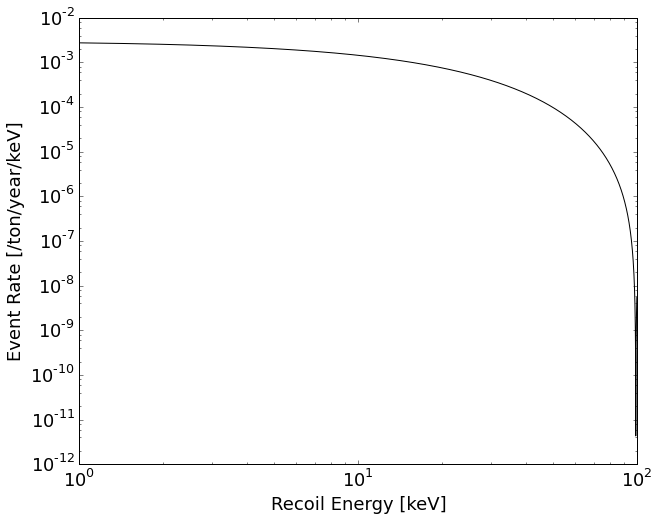

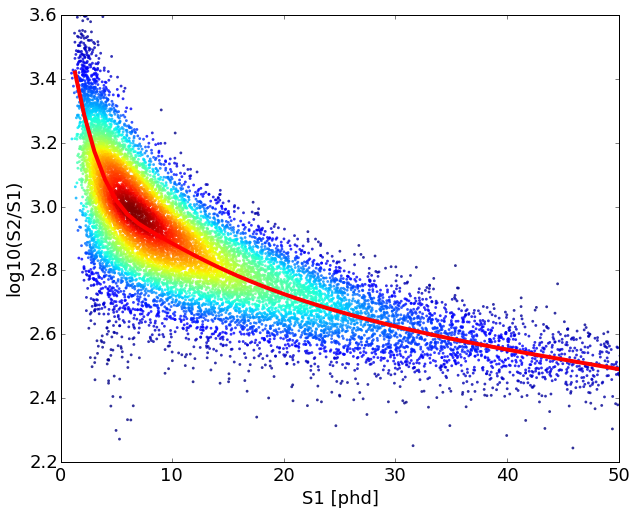

In [4]:
# ATM nu PDF
file_path='data/atm_Peter_update.txt' #caught a 2x error in rate
title='ATM'
ParticleType='NR'
nSim=2e4

NEST=NEST_setup(ParticleType=ParticleType)
Nph, Ne, S1, S2, S1c, S2c, Rate_evts_kg_day, Det_exposure_factor = dN2S1S2(NEST=NEST, file_path=file_path, nSim=nSim)

WS_cut=(S1c>0) & (S2>=S2raw_min)
S1_cut=S1c[WS_cut]
S2_cut=S2c[WS_cut]

#make a scatter plot
plt.figure()
scatterColor(S1_cut,log10(S2_cut/S1_cut))
plt.xlabel('S1 [phd]')
plt.ylabel('log10(S2/S1)')
#plt.plot([S1_min,S1_min],[2,3.8],'-.m',linewidth=4)
#plt.plot([S1_max,S1_max],[2,3.8],'-.m',linewidth=4)
plot(S1_bin_cen_n,sNR(S1_bin_cen_n),'-r',linewidth=4)
#plot(S1_bin_cen_n,mean_S2oS1_e,'-b',linewidth=4)
plt.xlim([0,50])
plt.ylim([2.2,3.6])

savefig('figs/'+title+'_S2S1.png')

#calc LZ  nominal exposure
calc_exposure(S1_cut, S2_cut)

<h1> B8 nu PDF </h1>

total between 1.00 and 4.40 keV = 0.000260662 [evts/kg/day]
Detector exposure factor = 1370.14
Count (0 to 20S1) = 7.093 +/- 0.072
Count below NR mean (0 to 20S1) = 7.093 +/- 0.072


TROOT::Append:0: RuntimeWarning: Replacing existing TH1: LCE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: EField (Potential memory leak).


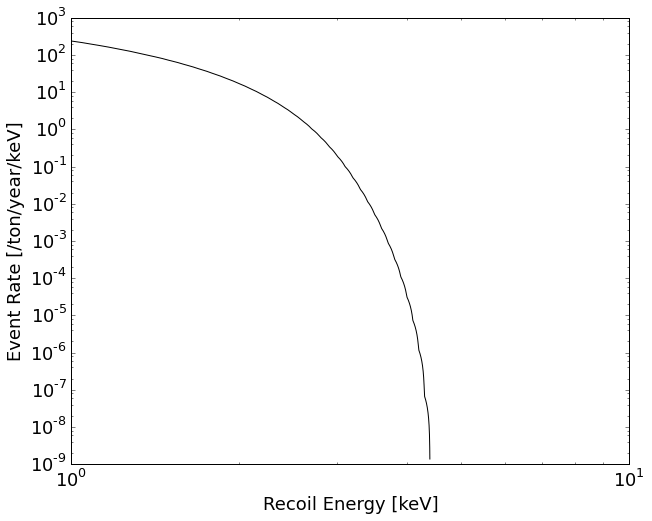

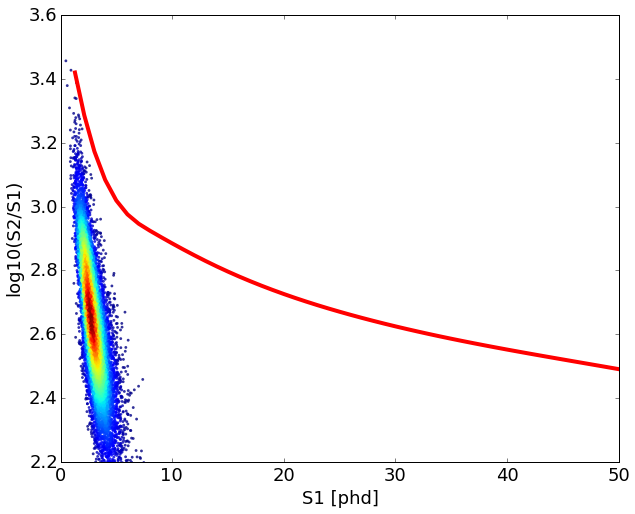

In [5]:
# B8 nu PDF
file_path='data/B8_Peter.txt' #caught a 2x error in rate
title='B8'
ParticleType='NR'
nSim=2e6

NEST=NEST_setup(ParticleType=ParticleType)
Nph, Ne, S1, S2, S1c, S2c, Rate_evts_kg_day, Det_exposure_factor = dN2S1S2(NEST=NEST, file_path=file_path, nSim=nSim)

WS_cut=(S1c>0) & (S2>=S2raw_min)
S1_cut=S1c[WS_cut]
S2_cut=S2c[WS_cut]

#make a scatter plot
plt.figure()
scatterColor(S1_cut,log10(S2_cut/S1_cut))
plt.xlabel('S1 [phd]')
plt.ylabel('log10(S2/S1)')
#plt.plot([S1_min,S1_min],[2,3.8],'-.m',linewidth=4)
#plt.plot([S1_max,S1_max],[2,3.8],'-.m',linewidth=4)
plot(S1_bin_cen_n,sNR(S1_bin_cen_n),'-r',linewidth=4)
#plot(S1_bin_cen_n,mean_S2oS1_e,'-b',linewidth=4)
plt.xlim([0,50])
plt.ylim([2.2,3.6])

savefig('figs/'+title+'_S2S1.png')

#calc LZ  nominal exposure
calc_exposure(S1_cut, S2_cut)

<h1> HEP nu PDF </h1>

total between 0.10 and 5.80 keV = 6.32879e-06 [evts/kg/day]
Detector exposure factor = 56431.5
Count (0 to 20S1) = 0.235 +/- 0.002
Count below NR mean (0 to 20S1) = 0.235 +/- 0.002


TROOT::Append:0: RuntimeWarning: Replacing existing TH1: LCE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: EField (Potential memory leak).


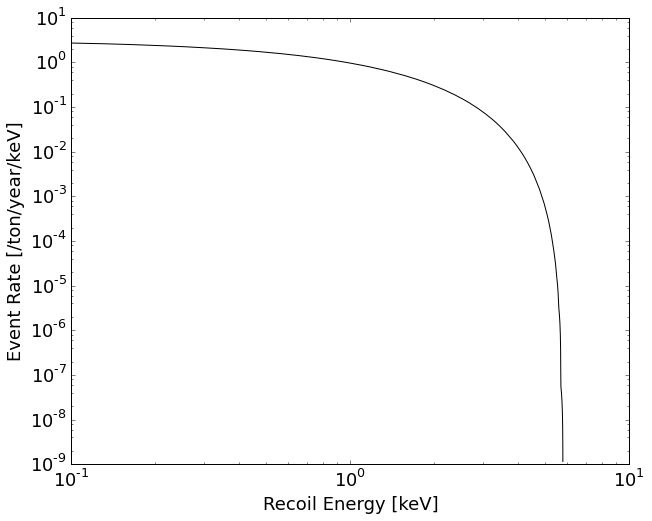

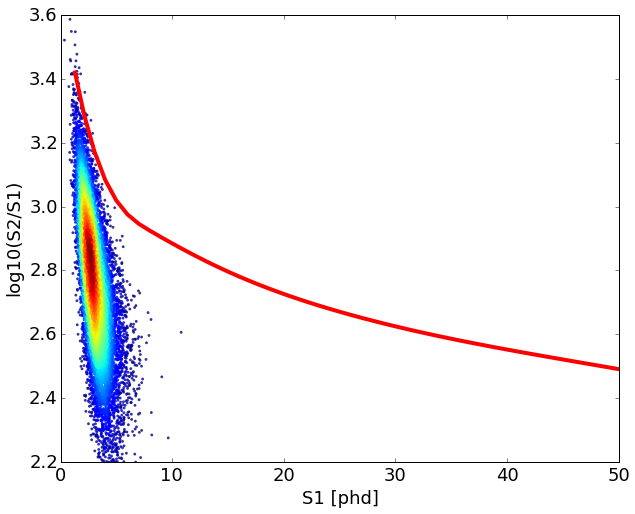

In [6]:
# HEP nu PDF
file_path='data/hep_Peter.txt' #caught a 2x error in rate
title='HEP'
ParticleType='NR'
nSim=2e6

NEST=NEST_setup(ParticleType=ParticleType)
Nph, Ne, S1, S2, S1c, S2c, Rate_evts_kg_day, Det_exposure_factor = dN2S1S2(NEST=NEST, file_path=file_path, nSim=nSim)

WS_cut=(S1c>0) & (S2>=S2raw_min)
S1_cut=S1c[WS_cut]
S2_cut=S2c[WS_cut]

#make a scatter plot
plt.figure()
scatterColor(S1_cut,log10(S2_cut/S1_cut))
plt.xlabel('S1 [phd]')
plt.ylabel('log10(S2/S1)')
#plt.plot([S1_min,S1_min],[2,3.8],'-.m',linewidth=4)
#plt.plot([S1_max,S1_max],[2,3.8],'-.m',linewidth=4)
plot(S1_bin_cen_n,sNR(S1_bin_cen_n),'-r',linewidth=4)
#plot(S1_bin_cen_n,mean_S2oS1_e,'-b',linewidth=4)
plt.xlim([0,50])
plt.ylim([2.2,3.6])

savefig('figs/'+title+'_S2S1.png')

#calc LZ  nominal exposure
calc_exposure(S1_cut, S2_cut)

<h1> DSN nu PDF </h1>

total between 0.10 and 118.35 keV = 1.21975e-07 [evts/kg/day]
Detector exposure factor = 73199.8
Count (0 to 20S1) = 0.091 +/- 0.001
Count below NR mean (0 to 20S1) = 0.064 +/- 0.001


TROOT::Append:0: RuntimeWarning: Replacing existing TH1: LCE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: EField (Potential memory leak).


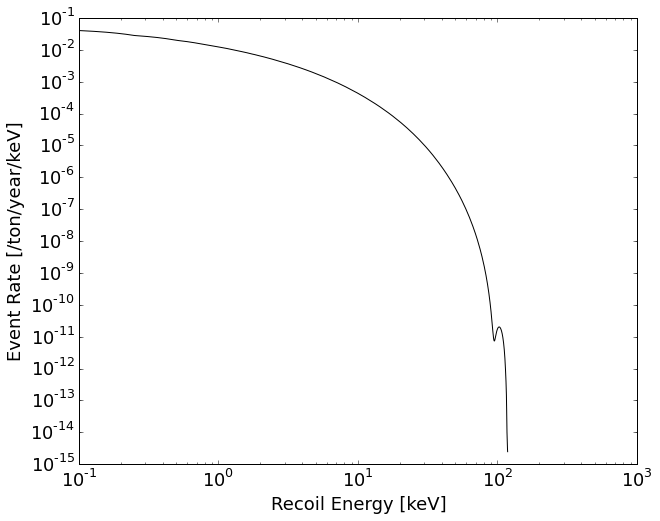

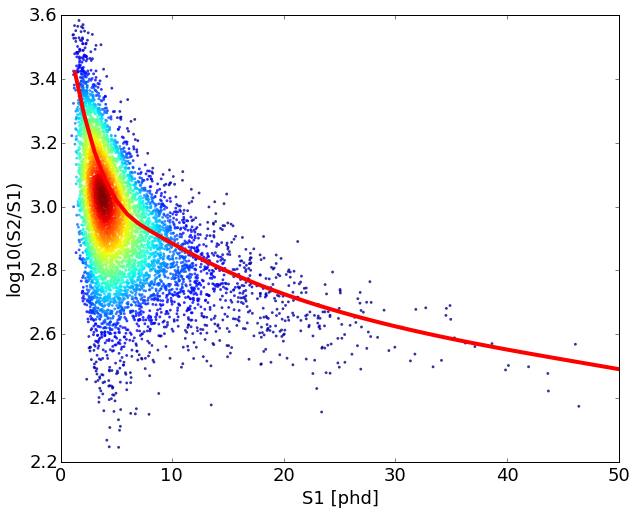

In [7]:
# DSN nu PDF
file_path='data/DSN_DiffRate.txt' #caught a 2x error in rate
title='DSN'
ParticleType='NR'
nSim=5e4

NEST=NEST_setup(ParticleType=ParticleType)
Nph, Ne, S1, S2, S1c, S2c, Rate_evts_kg_day, Det_exposure_factor = dN2S1S2(NEST=NEST, file_path=file_path, nSim=nSim)

WS_cut=(S1c>0) & (S2>=S2raw_min)
S1_cut=S1c[WS_cut]
S2_cut=S2c[WS_cut]

#make a scatter plot
plt.figure()
scatterColor(S1_cut,log10(S2_cut/S1_cut))
plt.xlabel('S1 [phd]')
plt.ylabel('log10(S2/S1)')
#plt.plot([S1_min,S1_min],[2,3.8],'-.m',linewidth=4)
#plt.plot([S1_max,S1_max],[2,3.8],'-.m',linewidth=4)
plot(S1_bin_cen_n,sNR(S1_bin_cen_n),'-r',linewidth=4)
#plot(S1_bin_cen_n,mean_S2oS1_e,'-b',linewidth=4)
plt.xlim([0,50])
plt.ylim([2.2,3.6])

savefig('figs/'+title+'_S2S1.png')

#calc LZ  nominal exposure
calc_exposure(S1_cut, S2_cut)

<h1> PP + 7 Be </h1>

total between 0.00 and 200.00 keV = 0.00110144 [evts/kg/day]
Detector exposure factor = 8.1063
Count (0 to 20S1) = 285.087 +/- 5.930
Count below NR mean (0 to 20S1) = 1.357 +/- 0.409


TROOT::Append:0: RuntimeWarning: Replacing existing TH1: LCE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: EField (Potential memory leak).


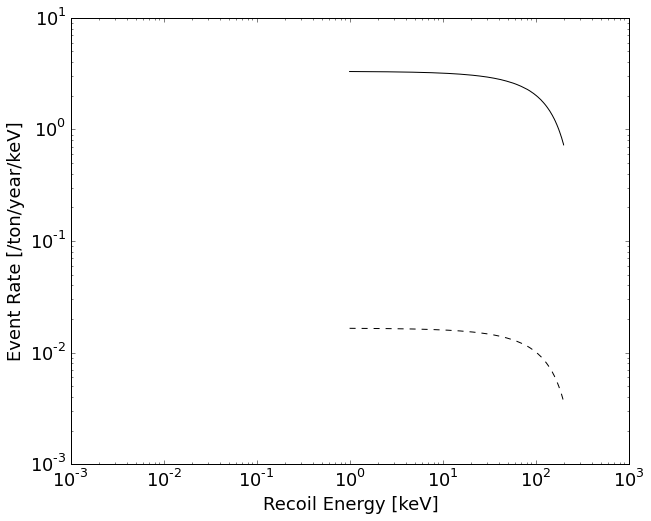

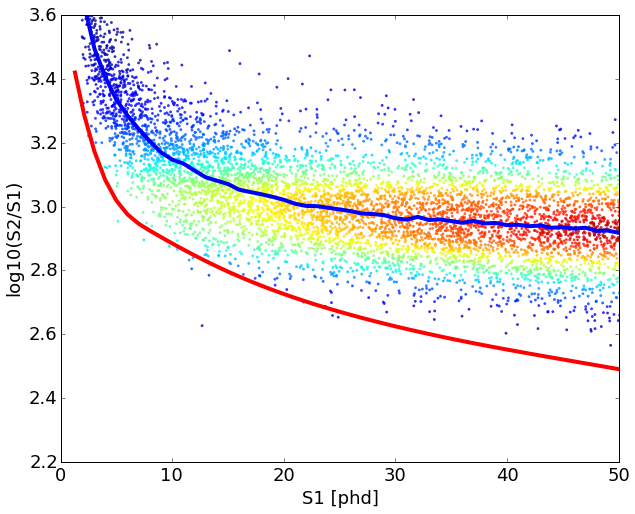

In [8]:
# PP nu PDF
file_path='data/PPsolarNu_Peter.txt' #caught a 2x error in rate
title='DSN'
ParticleType='ER'
nSim=5e4

NEST=NEST_setup(ParticleType=ParticleType)
Nph, Ne, S1, S2, S1c, S2c, Rate_evts_kg_day, Det_exposure_factor = dN2S1S2(NEST=NEST, file_path=file_path, nSim=nSim)

WS_cut=(S1c>0) & (S2>=S2raw_min)
S1_cut=S1c[WS_cut]
S2_cut=S2c[WS_cut]

#make a scatter plot
plt.figure()
scatterColor(S1_cut,log10(S2_cut/S1_cut))
plt.xlabel('S1 [phd]')
plt.ylabel('log10(S2/S1)')
#plt.plot([S1_min,S1_min],[2,3.8],'-.m',linewidth=4)
#plt.plot([S1_max,S1_max],[2,3.8],'-.m',linewidth=4)
plot(S1_bin_cen_n,sNR(S1_bin_cen_n),'-r',linewidth=4)
plot(S1_bin_cen_n,mean_S2oS1_e,'-b',linewidth=4)
plt.xlim([0,50])
plt.ylim([2.2,3.6])

savefig('figs/'+title+'_S2S1.png')

#calc LZ  nominal exposure
calc_exposure(S1_cut, S2_cut)

<h1> Generate WIMP signal </h1>

total rate above 0.00 keV = 804491 [evts/kg/day per pb]
Detector exposure factor per pb = 4.43936e-08
total rate above 0.00 keV = 1.40674e+06 [evts/kg/day per pb]
Detector exposure factor per pb = 1.01552e-08
total rate above 0.00 keV = 1.82239e+06 [evts/kg/day per pb]
Detector exposure factor per pb = 3.91949e-09
total rate above 0.00 keV = 1.82842e+06 [evts/kg/day per pb]
Detector exposure factor per pb = 1.95328e-09


TROOT::Append:0: RuntimeWarning: Replacing existing TH1: LCE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: EField (Potential memory leak).


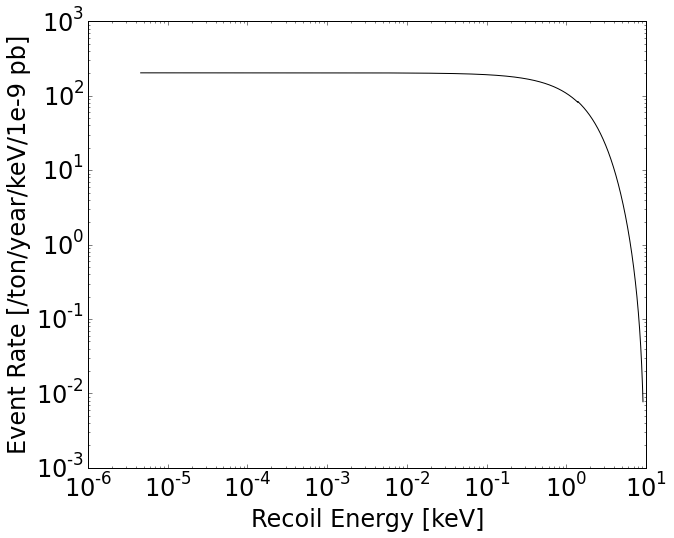

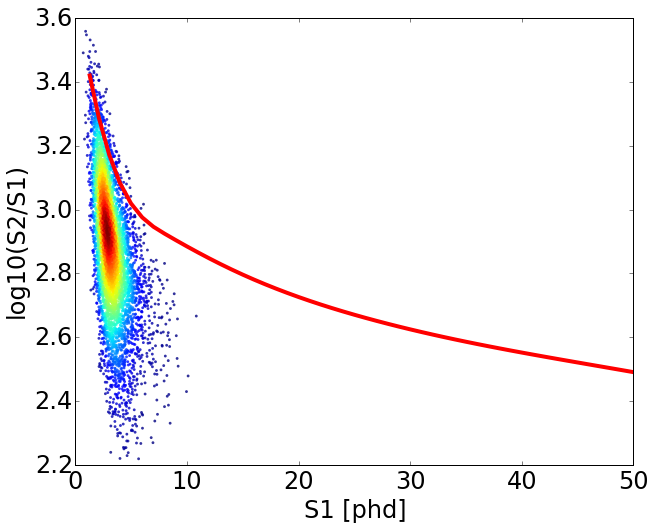

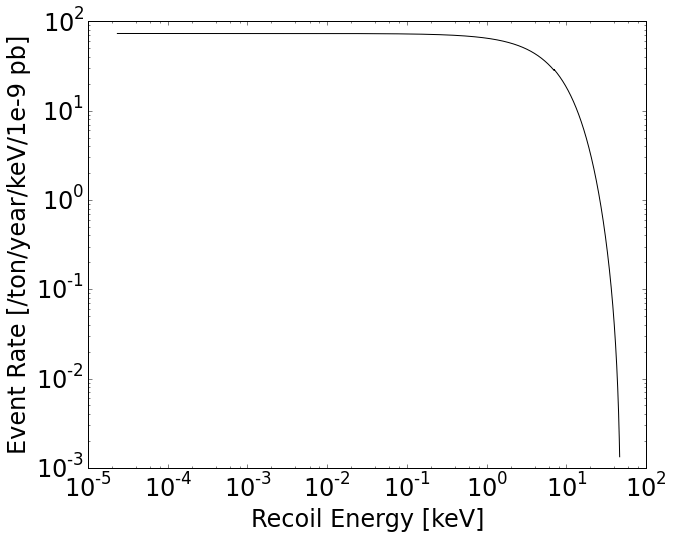

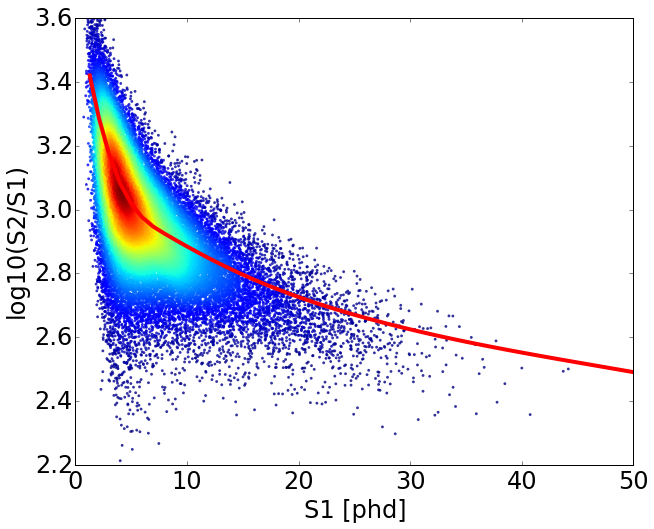

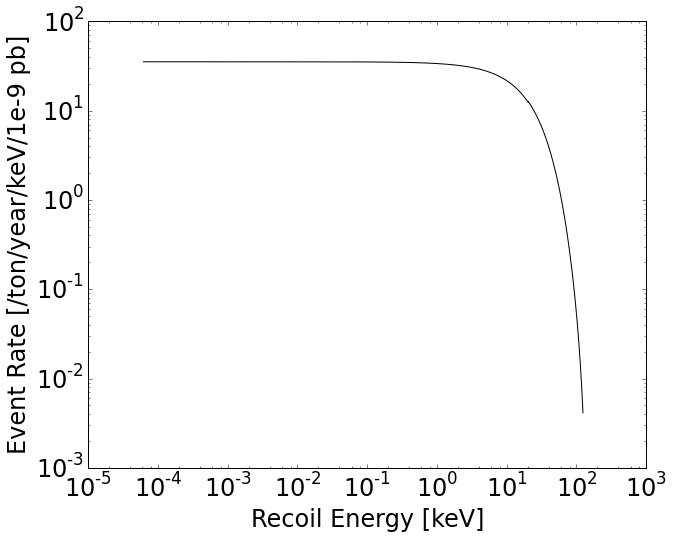

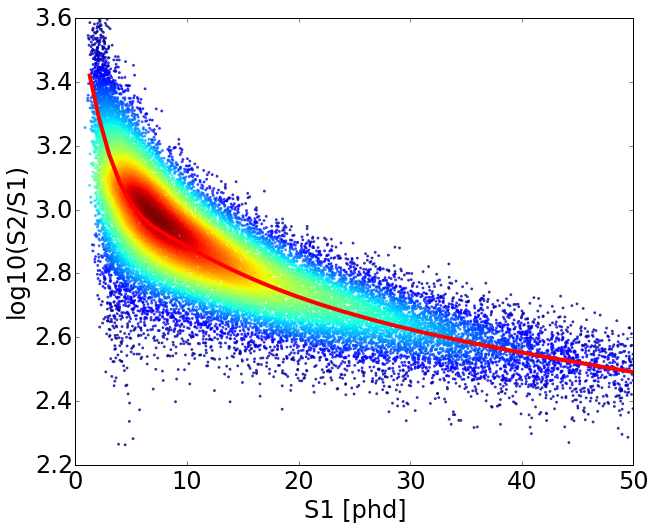

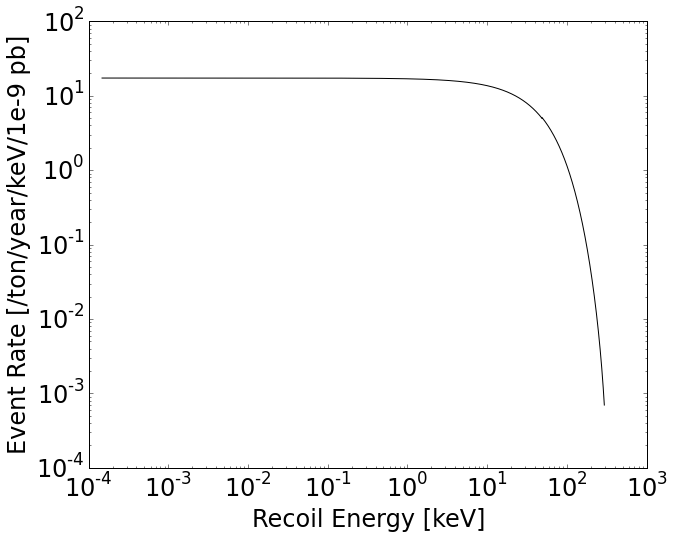

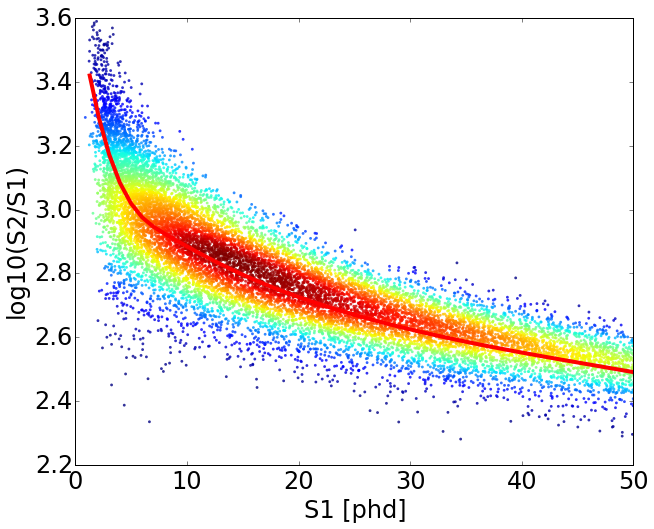

In [9]:
nSim=1e4
NEST=NEST_setup() #defult is LZ and NR

#Generate WIMPs
for mWmp,nSim in zip(int32([10,25,50,100]),int32([2e5,8e4,4e4,2e4])):
    Nph, Ne, S1, S2, S1c, S2c, WmpRate, Det_exposure_factor=WIMP2NphNe(NEST=NEST,mWmp=mWmp,nSim=nSim)
    # 1e-45 cm^2 cross section
    title='WIMP_M'+str(mWmp)

    WS_cut=(S1c>0) & (S2>=S2raw_min)
    S1_cut=S1c[WS_cut]
    S2_cut=S2c[WS_cut]

    #make a scatter plot
    plt.figure()
    scatterColor(S1_cut,log10(S2_cut/S1_cut))
    plt.xlabel('S1 [phd]')
    plt.ylabel('log10(S2/S1)')
    plt.rcParams.update({'font.size': 24})
    #plt.plot([S1_min,S1_min],[2,3.8],'-.m',linewidth=4)
    #plt.plot([S1_max,S1_max],[2,3.8],'-.m',linewidth=4)
    plot(S1_bin_cen_n,sNR(S1_bin_cen_n),'-r',linewidth=4)
    plt.xlim([0,50])
    plt.ylim([2.2,3.6])
    savefig('figs/'+title+'_S2S1.png')


<h1> Check NR interpolation </h1>

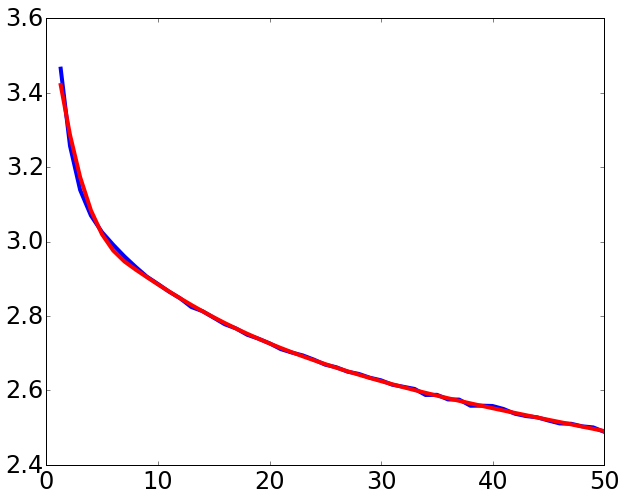

In [10]:
plot(S1_bin_cen_n,mean_S2oS1_n,'-b',linewidth=4)
#get NR mean, with a smooth spline
sNR = ip.UnivariateSpline(S1_bin_cen_n, mean_S2oS1_n,s=.005)
plot(S1_bin_cen_n,sNR(S1_bin_cen_n),'-r',linewidth=4)